<a href="https://colab.research.google.com/github/ariansajina/bachelor-thesis/blob/master/AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports and listed versions

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print(f'tensorflow=={tf.__version__}')
print(f'pandas=={pd.__version__}')
print(f'numpy=={np.__version__}')
print(f'matplotlib=={matplotlib.__version__}')

tensorflow==2.3.0
pandas==1.1.4
numpy==1.18.5
matplotlib==3.2.2


### Data sources

* S&P500 from 2008-01-02 to 2018-11-27 (as used in the paper): https://finance.yahoo.com/quote/%5EGSPC/history?period1=1199232000&period2=1543276800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

* Wilshire 5000: https://finance.yahoo.com/quote/%5EW5000/history?period1=1573911138&period2=1605533538&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [5]:
url_sp500 = 'https://raw.githubusercontent.com/alexander34ro/AML-Replicating-Novel-Deep-Learning-with-CNN-and-Bi-Directional-LSTM-for-Improved-Index-Prediction/main/S%26P500.csv'
url_wilshire = 'https://raw.githubusercontent.com/alexander34ro/AML-Replicating-Novel-Deep-Learning-with-CNN-and-Bi-Directional-LSTM-for-Improved-Index-Prediction/main/%5EW5000.csv'

In [6]:
df = pd.read_csv(url_sp500, index_col='Date')

In [ ]:
#df = pd.read_csv(url_wilshire, index_col='Date')

## S&P500 data description

In [ ]:
print(f'Number of rows: \t{df.shape[0]}')
print(f'Number of columns: \t{df.shape[1]}')
print(f'Columns: \t\t{", ".join(list(df.columns))}')

Number of rows: 	2746
Number of columns: 	6
Columns: 		Open, High, Low, Close, Adj Close, Volume


In [ ]:
# first 5 rows
print(df.head(5))
# last 5 rows
print(df.tail(5))

                   Open         High  ...    Adj Close      Volume
Date                                  ...                         
2008-01-02  1467.969971  1471.770020  ...  1447.160034  3452650000
2008-01-03  1447.550049  1456.800049  ...  1447.160034  3429500000
2008-01-04  1444.010010  1444.010010  ...  1411.630005  4166000000
2008-01-07  1414.069946  1423.869995  ...  1416.180054  4221260000
2008-01-08  1415.709961  1430.280029  ...  1390.189941  4705390000

[5 rows x 6 columns]
                   Open         High  ...    Adj Close      Volume
Date                                  ...                         
2018-11-19  2730.739990  2733.159912  ...  2690.729980  3772900000
2018-11-20  2654.600098  2669.439941  ...  2641.889893  4357900000
2018-11-21  2657.739990  2670.729980  ...  2649.929932  3233550000
2018-11-23  2633.360107  2647.550049  ...  2632.560059  1651650000
2018-11-26  2649.969971  2674.350098  ...  2673.449951  3443950000

[5 rows x 6 columns]


In [ ]:
# summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2.746000e+03
mean,1708.300461,1717.542164,1698.229986,1708.533732,1708.533732,4.018196e+09
std,560.929267,560.822181,560.947662,560.846932,560.846932,1.142968e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,1.025000e+09
25%,1257.654999,1264.467499,1247.747467,1257.772522,1257.772522,3.314200e+09
50%,1635.734985,1646.455017,1628.980041,1637.265015,1637.265015,3.745685e+09
75%,2098.585083,2104.265015,2088.189941,2098.777587,2098.777587,4.456238e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


In [ ]:
# check if any of the columns has missing values
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

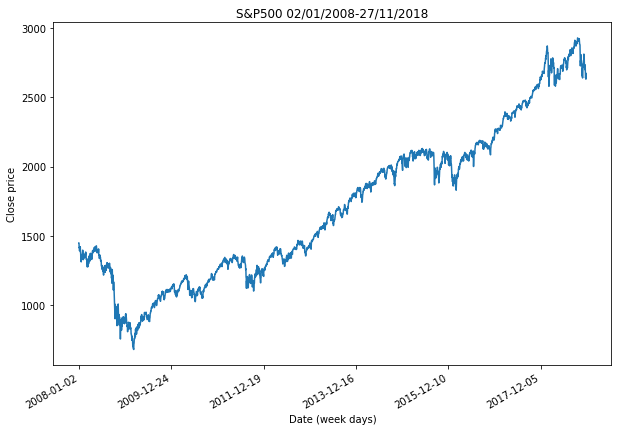

In [ ]:
# adapted from: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/date_index_formatter.html

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,7))

N = df.index.size
ind = np.arange(N)  # the evenly spaced plot indices

ax.plot(ind, df['Close'])

def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return df.index[thisind]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
fig.autofmt_xdate()

ax.set_ylabel('Close price')
ax.set_xlabel('Date (week days)')
ax.set_title('S&P500 02/01/2008-27/11/2018')
plt.show()

## Wilshire 5000 data description

In [ ]:
df = pd.read_csv(url_wilshire, index_col='Date')

In [ ]:
print(f'Number of rows: \t{df.shape[0]}')
print(f'Number of columns: \t{df.shape[1]}')
print(f'Columns: \t\t{", ".join(list(df.columns))}')

Number of rows: 	2746
Number of columns: 	6
Columns: 		Open, High, Low, Close, Adj Close, Volume


In [ ]:
# first 5 rows
print(df.head(5))
# last 5 rows
print(df.tail(5))

                    Open          High  ...     Adj Close  Volume
Date                                    ...                      
2008-01-02  14613.570313  14613.570313  ...  14613.570313     0.0
2008-01-03  14587.919922  14587.919922  ...  14587.919922     0.0
2008-01-04  14210.849609  14210.849609  ...  14210.849609     0.0
2008-01-07  14229.799805  14229.799805  ...  14229.799805     0.0
2008-01-08  13963.200195  13963.200195  ...  13963.200195     0.0

[5 rows x 6 columns]
                    Open          High  ...     Adj Close  Volume
Date                                    ...                      
2018-11-19  28142.630859  28173.730469  ...  27702.310547     0.0
2018-11-20  27301.339844  27485.810547  ...  27202.929688     0.0
2018-11-21  27202.929688  27547.789063  ...  27345.480469     0.0
2018-11-23  27266.160156  27353.349609  ...  27196.570313     0.0
2018-11-26  27318.339844  27629.039063  ...  27618.789063     0.0

[5 rows x 6 columns]


In [ ]:
# summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.0
mean,17826.795558,17912.301265,17738.106917,17833.180675,17833.180675,0.0
std,5873.519599,5890.666621,5854.148448,5871.715705,5871.715705,0.0
min,6858.430176,6858.430176,6858.430176,6858.430176,6858.430176,0.0
25%,13062.697754,13107.312744,13026.557129,13069.782226,13069.782226,0.0
50%,17269.719726,17354.865235,17175.214844,17282.299804,17282.299804,0.0
75%,22029.310059,22143.919434,21916.495606,22046.445312,22046.445312,0.0
max,30518.599609,30560.539063,30401.960938,30462.289063,30462.289063,0.0


In [ ]:
# check if any of the columns has missing values
df.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [ ]:
# get dates for which close price is missing
import datetime

def is_weekday(datetime_str):
  "Assumes datetime_str has format year-month-day, e.g. 2000-05-28."
  datetime_obj = datetime.datetime.strptime(datetime_str, '%Y-%m-%d')
  return datetime_obj.weekday() < 5

missing = df.index[df['Close'].isnull()]
print(f'There are {missing.size} missing values for the close price.')
print('The missing dates are:')
for date in missing: print(f'{date} --- is week day: {is_weekday(date)}')

There are 6 missing values for the close price.
The missing dates are:
2016-04-01 --- is week day: True
2016-05-03 --- is week day: True
2016-05-31 --- is week day: True
2016-07-22 --- is week day: True
2016-08-23 --- is week day: True
2016-08-25 --- is week day: True


In [ ]:
# drop rows with missing values
df = df.dropna()

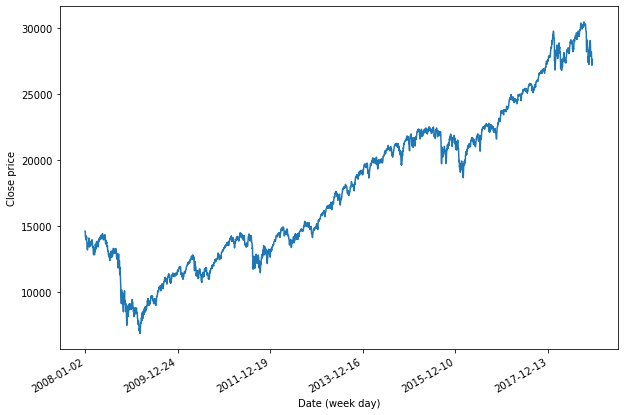

In [ ]:
# adapted from: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/date_index_formatter.html

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,7))

N = df.index.size
ind = np.arange(N)  # the evenly spaced plot indices

ax.plot(ind, df['Close'])

def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return df.index[thisind]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
fig.autofmt_xdate()

ax.set_ylabel('Close price')
ax.set_xlabel('Date (week day)')
plt.show()

## S&P500 and  Wilshire 5000 joint plot

In [ ]:
df_sp500 = pd.read_csv(url_sp500, index_col='Date')
df_wilshire = pd.read_csv(url_wilshire, index_col='Date')

In [ ]:
# drop missing rows for close price
missing = df_wilshire.index[df_wilshire['Close'].isnull()]
df_sp500.drop(index=missing, inplace=True)
df_wilshire.drop(index=missing, inplace=True)

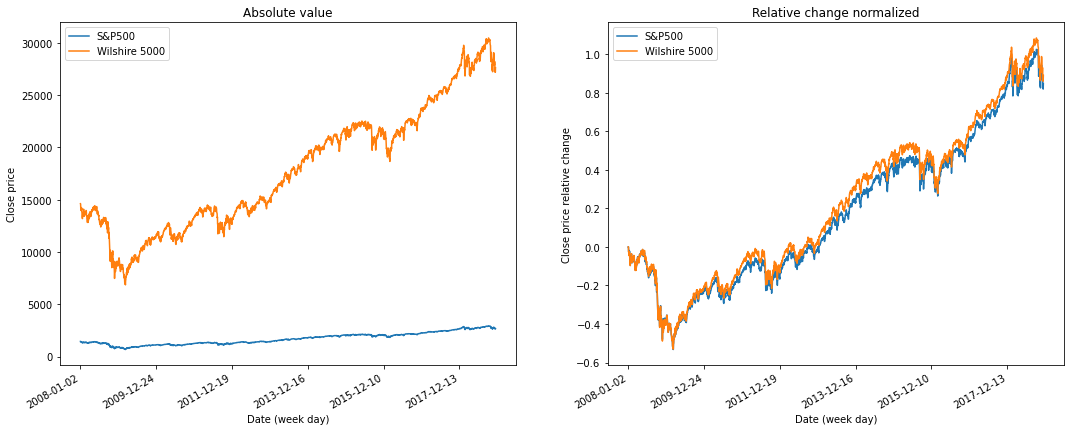

In [ ]:
# adapted from: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/date_index_formatter.html

import matplotlib.ticker as ticker

fig, axes = plt.subplots(1, 2, figsize=(18,7))

N = df_sp500.index.size
ind = np.arange(N)  # the evenly spaced plot indices

# absolute value
axes[0].plot(ind, df_sp500['Close'], label='S&P500')
axes[0].plot(ind, df_wilshire['Close'], label='Wilshire 5000')
axes[0].set_title('Absolute value')
axes[0].set_ylabel('Close price')
axes[0].set_xlabel('Date (week day)')

# relative change normalized
def normalize(x):
  return (x - x[0]) / x[0]
axes[1].plot(ind, normalize(df_sp500['Close']), label='S&P500')
axes[1].plot(ind, normalize(df_wilshire['Close']), label='Wilshire 5000')
axes[1].set_title('Relative change normalized')
axes[1].set_ylabel('Close price relative change')
axes[1].set_xlabel('Date (week day)')


def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return df.index[thisind]

for ax in axes:
  ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
  ax.legend()

fig.autofmt_xdate()
plt.show()

## Construct normalized sequences

"Each of the data segments was normalized by subtracting each price in the sequence by the first price in the sequence, then divide by the first price in the sequence. This form of normalization is called relative change."

In [7]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply

def relative_change_normalization(data):
  """
  df: pandas.DataFrame

  Returns df where each column is normalized by subtracting the first row of the
  column and then dividing by the first row of the column.
  """
  return data.apply(lambda x: (x - x[0]) / x[0])

In [27]:
def make_sequences(timeseries, sequence_length, target, to_numpy=False):
  """
  timeseries: pandas.Series
  sequence_length: positive integer
  to_numpy: Bool (default=False)

  Returns pandas.DataFrame where each column is name is based on the first day
  of the sequence and holds sequence_length number of consecutive entries of
  timeseries which we call a sequence.
  If to_numpy is True, then convert pandas.DataFrame to numpy array of shape
  (timeseries.size - sequence_length + 1, sequence_length).
  """
  sequence_ix = [np.arange(i, i + sequence_length) for i in np.arange(timeseries.size - (sequence_length + target) + 1)]
  df = pd.DataFrame(columns=timeseries.index[:-(sequence_length+target)+1], # columns as first day of sequence
                    data=np.array([timeseries[ix] for ix in sequence_ix]).T,
                    index=np.arange(sequence_length))
  df = relative_change_normalization(df)
  df.columns.rename('First day of sequence', inplace=True)
  df.index.rename('Day', inplace=True)

  # normalize target values relative to the first day of their corresponding sequence
  target_values_norm = timeseries[: timeseries.size - (sequence_length + target -1)].values
  target_values = (timeseries[sequence_length + target -1 :] - target_values_norm) / target_values_norm

  if to_numpy:
    return df.to_numpy().T, target_values.to_numpy()
  else:
    return df, target_values

In [28]:
X, y = make_sequences(df['Close'], 50, 7, to_numpy=False)

In [29]:
X.shape

(50, 2690)

In [30]:
y.shape

(2690,)

#### make_sequence usage example: 50 day running mean

In [ ]:
seqdf,_ = make_sequences(df['Close'], 50, 7, to_numpy=False)
running_mean_series = seqdf.mean()

In [ ]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,7))

N = df['Close'].index.size
ind = np.arange(N)  # the evenly spaced plot indices
ind_ = np.arange(running_mean_series.size) + 50

ax.plot(ind, df['Close'], label='Daily close price')
ax.plot(ind_, running_mean_series, label='50 day running mean')

def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return df.index[thisind]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
fig.autofmt_xdate()

ax.set_ylabel('Close price')
ax.set_xlabel('Date (week day)')
plt.legend()
plt.show()

#### Relative change normalization
"Each of the data segments was normalized by subtracting each price in the sequence by the first price in the sequence, then divide by the first price in the sequence. This form of normalization is called relative change."

# Hyper parameters

In [ ]:
learning_rate=0.001
rho=0.95 
epsilon=1e-07
cnn_kernel_sizes = 9
n_cnn_filters = 128
pool_size = 2

#loss and optimizer

In [ ]:
# loss and accuracy function
def MSE(y, y_p):
    """Return the Mean Squared Error.

    Keyword arguments:
    y -- actual values.
    y_p -- predicted values.
    """
    return tf.reduce_mean(tf.math.squared_difference(y, y_p))

In [ ]:
# The arguments are the default values of tf. The paper does not mention those values.
optimizer = tf.optimizers.Adadelta(learning_rate, rho, epsilon)

# **TODO** Initializing weights and biases



In [ ]:
# # Inspired by  https://www.datacamp.com/community/tutorials/cnn-tensorflow-python

# weights = {
# 'Wc1_1': tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, 1, n_cnn_filters])), # Weights of CNN for first pipeline and first conv layer
# 'Wc1_2': tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, n_cnn_filters, n_cnn_filters*2])),  # Weights of CNN for first pipeline and second conv layer
# 'Wc1_3': tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, n_cnn_filters*2, n_cnn_filters*4])),  # Weights of CNN for first pipeline and third conv layer

# 'Wc2_1': tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, 1, n_cnn_filters])), # Weights of CNN for second pipeline and first conv
# 'Wc2_2': tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, n_cnn_filters, n_cnn_filters*2])), # Weights of CNN for second pipeline and second conv layer
# 'Wc2_3': tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, n_cnn_filters*2, n_cnn_filters*4])), # Weights of CNN for second pipeline and third conv layer

# 'Wc3_1': tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, 1, n_cnn_filters])), # Weights of CNN for third pipeline and first conv layer
# 'Wc3_2': tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, n_cnn_filters, n_cnn_filters*2])), # Weights of CNN for third pipeline and second conv layer
# 'Wc3_3': tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, n_cnn_filters*2, n_cnn_filters*4])), # Weights of CNN for third pipeline and second conv layer



# 'Wbd1_1': tf.Variable(tf.random.normal(shape=)), # Weights of BDLSTM for first pipeline and first BDLSTM layer
# 'Wbd1_2': tf.Variable(tf.random.normal(shape=)), # Weights of BDLSTM for first pipeline and second BDLSTM layer

# 'wbd2_1': tf.Variable(tf.random.normal(shape=)), # Weights of BDLSTM for second pipeline and first BDLSTM layer
# 'wbd2_2': tf.Variable(tf.random.normal(shape=)), # Weights of BDLSTM for second pipeline and second BDLSTM layer


# 'Wbd3_1': tf.Variable(tf.random.normal(shape=)), # Weights of BDLSTM for third pipeline and first BDLSTM layer
# 'Wbd3_2': tf.Variable(tf.random.normal(shape=)), # Weights of BDLSTM for third pipeline and second BDLSTM layer


    
# 'Wd1': tf.Variable(tf.random.normal(shape=)), # Weights of Dense for first pipeline
# 'Wd2': tf.Variable(tf.random.normal(shape=)), # Weights of Dense for second pipeline
# 'Wd3': tf.Variable(tf.random.normal(shape=)), # Weights of Dense for third pipeline
    


# 'Wout': tf.Variable(tf.random.normal(shape=)) # Weights of Dense for output layer
# }


# biases = {
# 'Bc1_1': tf.Variable(tf.random.normal(shape=)), # Biases of CNN for first pipeline and first conv
# 'Bc1_2': tf.Variable(tf.random.normal(shape=)), # Biases of CNN for first pipeline and second conv
# 'Bc1_3': tf.Variable(tf.random.normal(shape=)), # Biases of CNN for first pipeline and third conv

# 'Bc2_1': tf.Variable(tf.random.normal(shape=)), # Biases of CNN for second pipeline and first conv
# 'Bc2_2': tf.Variable(tf.random.normal(shape=)), # Biases of CNN for second pipeline and second conv
# 'Bc2_3': tf.Variable(tf.random.normal(shape=)), # Biases of CNN for second pipeline and third conv

# 'Bc3_1': tf.Variable(tf.random.normal(shape=)), # Biases of CNN for third pipeline and first conv
# 'Bc3_2': tf.Variable(tf.random.normal(shape=)), # Biases of CNN for third pipeline and second conv
# 'Bc3_3': tf.Variable(tf.random.normal(shape=)), # Biases of CNN for third pipeline and third conv


    
# 'Bbd1': tf.Variable(tf.random.normal(shape=)), # Biases of BDLSTM for first pipeline
# 'Bbd2': tf.Variable(tf.random.normal(shape=)), # Biases of BDLSTM for second pipeline
# 'Bbd3': tf.Variable(tf.random.normal(shape=)), # Biases of BDLSTM for third pipeline
    


# 'Bd1': tf.Variable(tf.random.normal(shape=)), # Biases of Dense for first pipeline
# 'Bd2': tf.Variable(tf.random.normal(shape=)), # Biases of Dense for second pipeline
# 'Bd3': tf.Variable(tf.random.normal(shape=)), # Biases of Dense for third pipeline
    


# 'Bout': tf.Variable(tf.random.normal(shape=)) # Biases of Dense for output layer
# }



In [ ]:
# Conv1D Layers

In [ ]:
# LSTM Layers

# CONTEXT
# Theory: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

# CODE
# Useful: https://stackoverflow.com/questions/54767816/how-exactly-does-lstmcell-from-tensorflow-operates
# GitHub: https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py#L809-L1089

"""
The output from the CNN group is fed into the Bi-
directional LSTM layer group which:

1) learns using 200 pairs of forward and backward LSTM units.
2) gives an output sequence of length 400
3) drops 50% (dropout) of the weights to generalize the model.

The two dimensional output of this group is then fed to a
dense layer.
"""

# Hyper parameters 
units = 200

# Single forward and backwards cells
lstm_fw_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=units)
lstm_bw_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=units)
print(lstm_fw_cell.state_size, lstm_fw_cell.output_size)

# tf.nn.bidirectional_rnn takes a list of tensors with shape 
# [batch_size x cell_fw.state_size], so separate the input into discrete
# timesteps.
# state_fw and state_bw are the final states of the forwards/backwards LSTM, respectively
_X = X.to_numpy()
__X = tf.unstack(_X, 2690, 1)
print(__X[0])
### Getting errors
# https://www.easy-tensorflow.com/tf-tutorials/recurrent-neural-networks/bidirectional-rnn-for-classification
tf.compat.v1.nn.bidirectional_dynamic_rnn(lstm_fw_cell, lstm_bw_cell, __X, sequence_length=[50, 2690, 1] , dtype=tf.float64)

LSTMStateTuple(c=200, h=200) 200
tf.Tensor(
[1447.160034 1447.160034 1411.630005 1416.180054 1390.189941 1409.130005
 1420.329956 1401.02002  1416.25     1380.949951 1373.199951 1333.25
 1325.189941 1310.5      1338.599976 1352.069946 1330.609985 1353.959961
 1362.300049 1355.810059 1378.550049 1395.420044 1380.819946 1336.640015
 1326.449951 1336.910034 1331.290039 1339.130005 1348.859985 1367.209961
 1348.859985 1349.98999  1348.780029 1360.030029 1342.530029 1353.109985
 1371.800049 1381.290039 1380.02002  1367.680054 1330.630005 1331.339966
 1326.75     1333.699951 1304.339966 1293.369995 1273.369995 1320.650024
 1308.77002  1315.47998 ], shape=(50,), dtype=float64)


ValueError: ignored

# Test NN amir

In [ ]:
seg = make_sequences(df['Close'], 50, to_numpy=False)
norma = relative_change_normalization(seg)
X = norma.T.values
X.shape
X = X.reshape(2691,1,50)
y = np.delete(norma.iloc[-1].to_numpy(), 0)

In [ ]:
Wc1_1 = tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, 1, n_cnn_filters], dtype=tf.float64)) # Weights of CNN for first pipeline and first conv layer
Wc1_2 = tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, n_cnn_filters, n_cnn_filters*2], dtype=tf.float64))  # Weights of CNN for first pipeline and second conv layer
Wc1_3 = tf.Variable(tf.random.normal(shape=[cnn_kernel_sizes, n_cnn_filters*2, n_cnn_filters*4], dtype=tf.float64))  # Weights of CNN for first pipeline and third conv layer


Wd1 = tf.Variable(tf.random.normal(shape=[n_cnn_filters*4, n_cnn_filters*4], dtype=tf.float64)) # Weights of Dense for first pipeline

Wout = tf.Variable(tf.random.normal(shape=[n_cnn_filters*4, 1], dtype=tf.float64)) # Weights of Dense for output layer




Bc1_1 = tf.Variable(tf.random.normal(shape=[n_cnn_filters], dtype=tf.float64)) # Biases of CNN for first pipeline and first conv
Bc1_2 = tf.Variable(tf.random.normal(shape=[n_cnn_filters*2], dtype=tf.float64)) # Biases of CNN for first pipeline and second conv
Bc1_3 = tf.Variable(tf.random.normal(shape=[n_cnn_filters*4], dtype=tf.float64)) # Biases of CNN for first pipeline and third conv

Bd1 = tf.Variable(tf.random.normal(shape=[n_cnn_filters*4], dtype=tf.float64)) # Biases of Danse for first pipeline
Bout = tf.Variable(tf.random.normal(shape=[1], dtype=tf.float64)) # Biases of Dense for output layer

In [ ]:
def conv_1d(x, W, b, s=1):
    # Conv1D wrapper, with bias and relu activation
    x = tf.nn.conv1d(input=x, filters=W, stride=1, padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool_1d(x, k=2):
    return tf.nn.max_pool(x, ksize=2, strides=1, padding='SAME')

In [ ]:
def feedforward(x):
    z1 = tf.nn.relu(   conv_1d(x,  Wc1_1,   Bc1_1)    )
    z1 = maxpool_1d(z1)
    
    z2 = tf.nn.relu(   conv_1d(z1,  Wc1_2,   Bc1_2)    )
    z2 = maxpool_1d(z2)
    
    z3 = tf.nn.relu(   conv_1d(z2,  Wc1_3,   Bc1_3)    )
    z3 = maxpool_1d(z3)
    
    # Fully connected layer
    # Reshape conv1 output to fit fully connected layer input
    fc1 = tf.reshape(z3, [-1, Wd1.get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, Wd1), Bd1)
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term.
    out = tf.add(tf.matmul(fc1, Wout), Bout)
    
    return out

In [ ]:
# Optimization process. 
def run_optimization(x, y):
# Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = feedforward(x)
        
        loss = MSE(y, pred)

        # calculate the gradients of the loss with respect to the variables in the provided list
        gradients = g.gradient(loss, [Wc1_1, Bc1_1, Wc1_2, Bc1_2, Wc1_3, Bc1_3, Wd1, Bd1, Wout, Bout])
    # perform the update
    optimizer.apply_gradients(zip(gradients, [Wc1_1, Bc1_1, Wc1_2, Bc1_2, Wc1_3, Bc1_3, Wd1, Bd1, Wout, Bout]))

In [ ]:
def train(X_tr, Y_tr):
    for e in range(512):
        # Run the optimization to update W and b values.
        run_optimization(X_tr, Y_tr)

        if e % 50 == 0:

            pred = feedforward(X_tr)
            loss = MSE(Y_tr, pred)
            acc = MSE(Y_tr, pred)
            
            print(f"epoch/step: {e}, loss: {loss}, accuracy: {acc}")

In [ ]:
train(X,y)

NotFoundError: ignored